# Plot results
After having completed the experiments, all results were saved into ALPBenchmark.db. In this notebook we showcase how to extract all results from there to generate budget performance plots. Since we stored this in a file, we will make us of the object StudyDataFromFile(). In case you would have used a database server, you would use the StudyDataFromDatabase() object. Both are implemented in evaluation/analysis/get_results.py.

In [1]:
import json
import os
import numpy as np
import pandas as pd
from py_experimenter.experimenter import PyExperimenter
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind as tt
import os, sys
from alpbench.evaluation.analysis.get_results import StudyDataFromFile
from alpbench.evaluation.analysis.plot_functions import BudgetPerformancePlot

In [2]:
db_name = "ALPBenchmark.db"
study = StudyDataFromFile("DATAFRAMES", db_name)

In [3]:
study.get_dataframes()

### Generate dataframe that merges information of the different dataframes: results, accuracies and labelin

In [4]:
dataframe = study.generate_summary_df()

Experiment 0 of 60


In [5]:
openmlids = dataframe["openml_id"].unique()
learners = dataframe["learner_name"].unique()

In [6]:
dataframe

,setting_name,openml_id,learner_name,query_strategy_name,test_split_seed,train_split_seed,seed,iteration,test_accuracy,test_f1,test_precision,test_recall,test_auc,test_log_loss,len_X_l
0,small,11,rf_entropy,random,0,0,0,0.0,0.768116,0.737529,0.719432,0.768116,0.788188,1.383701,30.0
1,small,11,rf_entropy,random,0,0,0,1.0,0.734300,0.722556,0.724487,0.734300,0.768682,1.300707,40.0
2,small,11,rf_entropy,random,0,0,0,2.0,0.739130,0.727697,0.729399,0.739130,0.783580,0.977846,50.0
3,small,11,rf_entropy,random,0,0,0,3.0,0.782609,0.771646,0.762339,0.782609,0.796341,0.725621,60.0
4,small,11,rf_entropy,random,0,0,0,4.0,0.816425,0.793913,0.773714,0.816425,0.794686,0.872057,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,small,14,svm_rbf,cluster_margin,0,0,4,16.0,0.753030,0.747532,0.791471,0.753030,0.969373,0.805876,190.0
1256,small,14,svm_rbf,cluster_margin,0,0,4,17.0,0.740909,0.739475,0.780269,0.740909,0.969613,0.767180,200.0
1257,small,14,svm_rbf,cluster_margin,0,0,4,18.0,0.742424,0.733127,0.769103,0.742424,0.969304,0.770393,210.0
1258,small,14,svm_rbf,cluster_margin,0,0,4,19.0,0.730303,0.719490,0.761632,0.730303,0.970768,0.767862,220.0


### Generate budget curve plots for all existent dataset ids and learners

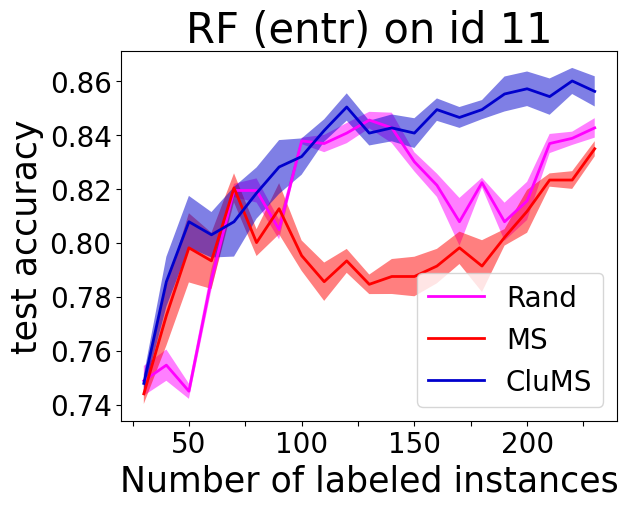

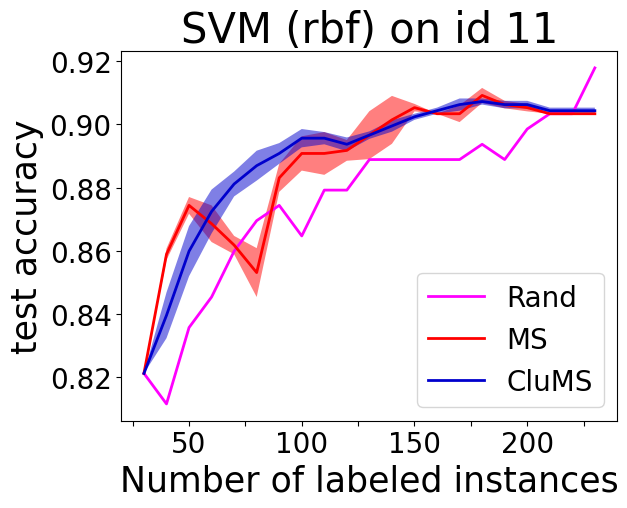

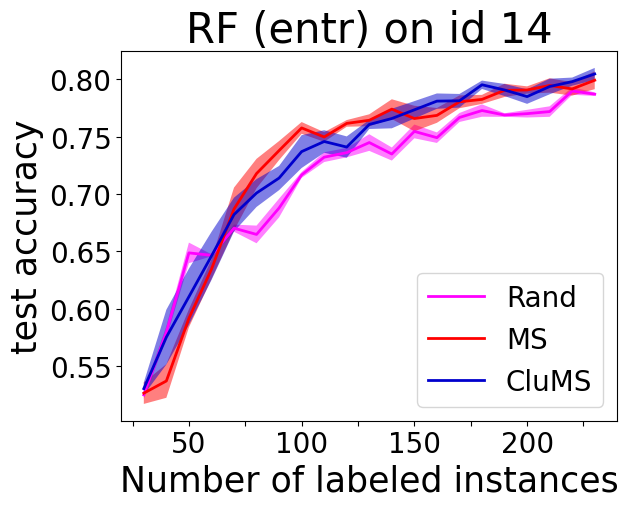

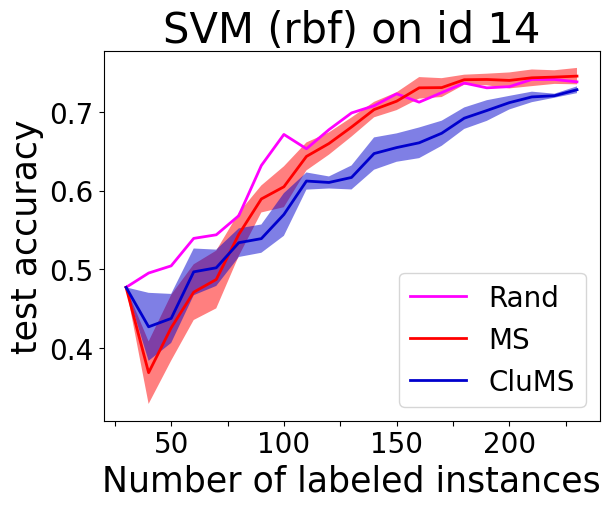

In [7]:
for oid in openmlids:
    for learner in learners:
        perfPlot = BudgetPerformancePlot(dataframe, oid, learner, "test_accuracy", "FIGURES/")
        perfPlot.generate_plot_data()
        perfPlot.show(show_fig=True)